In [1]:
import sys
import joblib
import numpy as np
from matplotlib import pyplot as plt

sys.path.append('../..')
from independence_test.evaluate_time import N_SAMPLES, DIM
%matplotlib inline

In [ ]:
RES_FNAME = '../saved_data/time_results.pkl'
results = joblib.load(RES_FNAME)
res_mats = {}
for method in ['chsic', 'kcit', 'kcipt', 'nn']:
    res_mats[method] = np.zeros((len(N_SAMPLES), len(DIM)))
    for row_id, n_samples in enumerate(N_SAMPLES):
        for col_id, dim in enumerate(DIM):
            try:
                res_mats[method][col_id, row_id] = results[method + '_{}_{}'.format(n_samples, dim)]
            except KeyError:
                pass
    res_mats[method][res_mats[method] == -2] = np.nan
    res_mats[method] = res_mats[method].T

In [ ]:
fig = plt.figure(figsize=(15, 4), facecolor='white')
cmap = plt.get_cmap('coolwarm')
cmap.set_bad('black',1.)
cmap.set_under('white', 1.)

plt.subplot(1, 4, 1)
plt.xlabel('Data dimensionality')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], DIM)
plt.ylabel('Number of samples')
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], N_SAMPLES)
plt.imshow(res_mats['chsic'], vmin=0, vmax=650, cmap=cmap)

plt.subplot(1, 4, 2)
plt.xlabel('Data dimensionality')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], DIM)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], [])
plt.imshow(res_mats['kcit'], vmin=0, vmax=650, cmap=cmap)

plt.subplot(1, 4, 3)
plt.xlabel('Data dimensionality')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], DIM)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], [])
plt.imshow(res_mats['kcipt'], vmin=0, vmax=650, cmap=cmap)

plt.subplot(1, 4, 4)
plt.xlabel('Data dimensionality')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], DIM)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], [])
plt.imshow(res_mats['nn'], vmin=0, vmax=650, cmap=cmap)

In [14]:
from independence_test.evaluation_settings import SAMPLE_NUMS, DSETS
from independence_test.utils import pc_ks
DSET_NAME = 'discrete'
RES_FNAME = '../saved_data/{}_results.pkl'.format(DSET_NAME)
res = joblib.load(RES_FNAME)
res_mats = {}
for method in ['chsic', 'kcit', 'nn']:
    for key in res.keys():
        pval_d = np.array(res[key])[:, 0]
        pval_i = np.array(res[key])[:, 1]
        res_mats[key] = (pc_ks(pval_d)[0], pc_ks(pval_i)[1], np.median(pval_i), pc_ks(pval_i)[0])

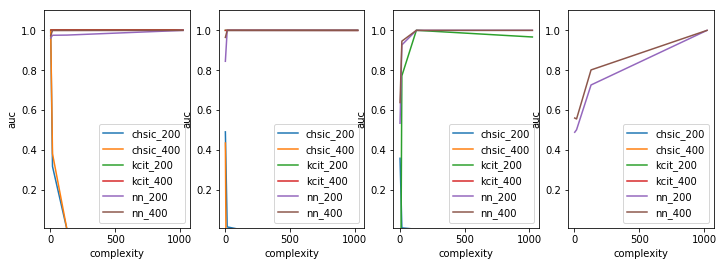

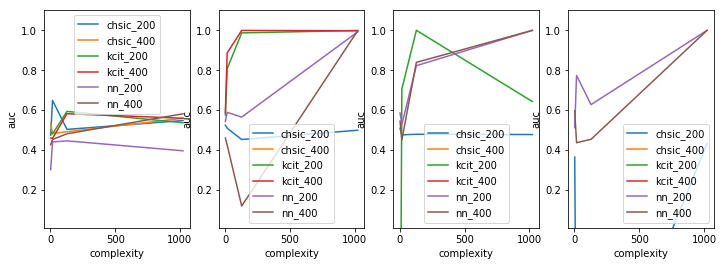

In [15]:
fig = plt.figure(figsize=(12,4), facecolor='white')
complexities = DSETS[DSET_NAME][1]
dimensionalities = DSETS[DSET_NAME][2]
for method_id, method in enumerate(['chsic', 'kcit', 'nn']):
    for n_samples_id, n_samples in enumerate([200, 400]):
        vals = np.zeros(len(complexities))
        for dim_id, dim in enumerate(dimensionalities):
            for cpl_id, cplxs in enumerate(complexities):
                key = '{}_{}_60mt_{}samples_{}dim_{}complexity'.format(
                    method, DSET_NAME, n_samples, dim, cplxs)
                vals[cpl_id] = res_mats[key][0]
            plt.subplot(1, len(dimensionalities), dim_id + 1)
            plt.plot(complexities, vals, '-', label='{}_{}'.format(method, n_samples))
            plt.xlabel('complexity')
            plt.ylabel('auc')
            plt.legend(loc='outside')
            plt.ylim([1e-2, 1.1])

            
fig = plt.figure(figsize=(12,4), facecolor='white')
complexities = DSETS[DSET_NAME][1]
dimensionalities = DSETS[DSET_NAME][2]
for method_id, method in enumerate(['chsic', 'kcit', 'nn']):
    for n_samples_id, n_samples in enumerate([200, 400]):
        vals = np.zeros(len(complexities))
        for dim_id, dim in enumerate(dimensionalities):
            for cpl_id, cplxs in enumerate(complexities):
                key = '{}_{}_60mt_{}samples_{}dim_{}complexity'.format(
                    method, DSET_NAME, n_samples, dim, cplxs)
                vals[cpl_id] = res_mats[key][3]
            plt.subplot(1, len(dimensionalities), dim_id + 1)
            plt.plot(complexities, vals, '-', label='{}_{}'.format(method, n_samples))
            plt.xlabel('complexity')
            plt.ylabel('auc')
            plt.legend(loc='outside')
            plt.ylim([1e-2, 1.1])
            
            
# for method_id, method in enumerate(['chsic', 'kcit', 'nn']):
#     for n_samples_id, n_samples in enumerate([200, 400]):
#         vals = np.zeros(3)
#         for cpl_id, cplxs in enumerate([.1, .3, .5]):
#             key = '{}_chaos_60mt_{}samples_1dim_{}complexity'.format(
#                 method, n_samples, cplxs)
#             vals[cpl_id] = res_mats[key][1]
#         plt.subplot(1, 3, 2)
#         plt.plot([.1, .3, .5], vals, '-', label=key[:-19])
#         plt.yscale('log')
#         plt.xlabel('gamma')
#         plt.ylabel('ks')
#         plt.legend(loc='outside')
        
# for method_id, method in enumerate(['chsic', 'kcit', 'nn']):
#     for n_samples_id, n_samples in enumerate([200, 400]):
#         vals = np.zeros(3)
#         for cpl_id, cplxs in enumerate([.1, .3, .5]):
#             key = '{}_chaos_60mt_{}samples_1dim_{}complexity'.format(
#                 method, n_samples, cplxs)
#             vals[cpl_id] = res_mats[key][2]
#         plt.subplot(1, 3, 3)
#         plt.plot([.1, .3, .5], vals, '-', label=key[:-19])
#         plt.ylim([0, 1])
#         plt.xlabel('gamma')
#         plt.ylabel('ks')
#         plt.legend(loc='outside')